In [1]:
pip install pandas numpy matplotlib seaborn wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load data
df = pd.read_csv('netflix1.csv')
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


df = pd.read_csv("netflix1.csv")  # or your file name
df.columns = df.columns.str.strip().str.lower()
df.head()


In [17]:
import os
print(os.listdir())


['.anaconda', '.android', '.cache', '.conda', '.condarc', '.config', '.console-ninja', '.continuum', '.icesoft', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', '.nbi', '.openjfx', '.ssh', '.th-client', '.virtual_documents', '.vscode', 'ansel', 'AppData', 'Application Data', 'Bellabeat_Strava_Pandas_Analysis.ipynb', 'Bellabeat_Strava_Pandas_Analysis.pdf', 'Contacts', 'Cookies', 'dailyActivity_merged.csv', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'googleplaystore.csv', 'Google_Playstore_App_Rating_Prediction.ipynb', 'heartrate_seconds_merged.csv', 'IBM_HR_Attrition_Analysis.ipynb', 'Life Expectancy Data.csv', 'Links', 'Local Settings', 'Microsoft', 'My Documents', 'netflix1.csv', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{c5ce8db6-da89-11ef-b6b7-f2f298ea373c}.TM.blf', 'NTUSER.DAT{c5ce8db6-da89-11ef-b6b7-f2f298ea373c}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{c5ce8db6-da89-11ef-b6b7-f2f298ea373c}.TMContainer0

In [18]:
df = pd.read_csv("netflix1.csv")  # Only works if file name is correct


In [19]:
df.columns = df.columns.str.strip().str.lower()


In [20]:
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


In [22]:
df.rename(columns={
    'direct or': 'director',
    'ca st': 'cast',
    'coun try': 'country'
}, inplace=True)



In [23]:
df.columns = df.columns.str.replace(' ', '').str.lower()


In [24]:
print(df.columns.tolist())



['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


In [26]:
# Clean and fix columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')

# Confirm fixed column names
print(df.columns.tolist())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Now drop rows where essential values are missing
if all(col in df.columns for col in ['director', 'cast', 'country']):
    df.dropna(subset=['director', 'cast', 'country'], inplace=True)

# Convert date_added
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Final info
df.info()


['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25416\708278481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


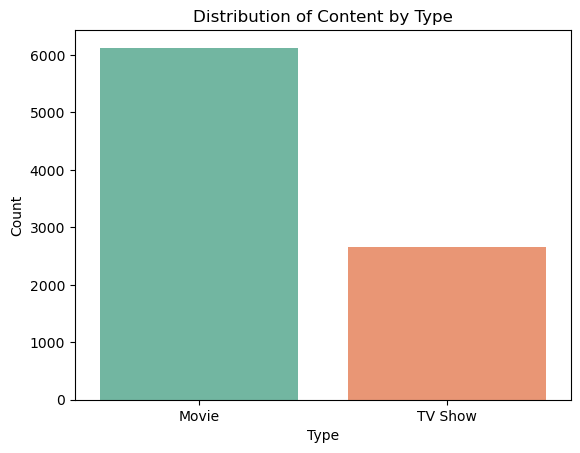

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25416\2800389999.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


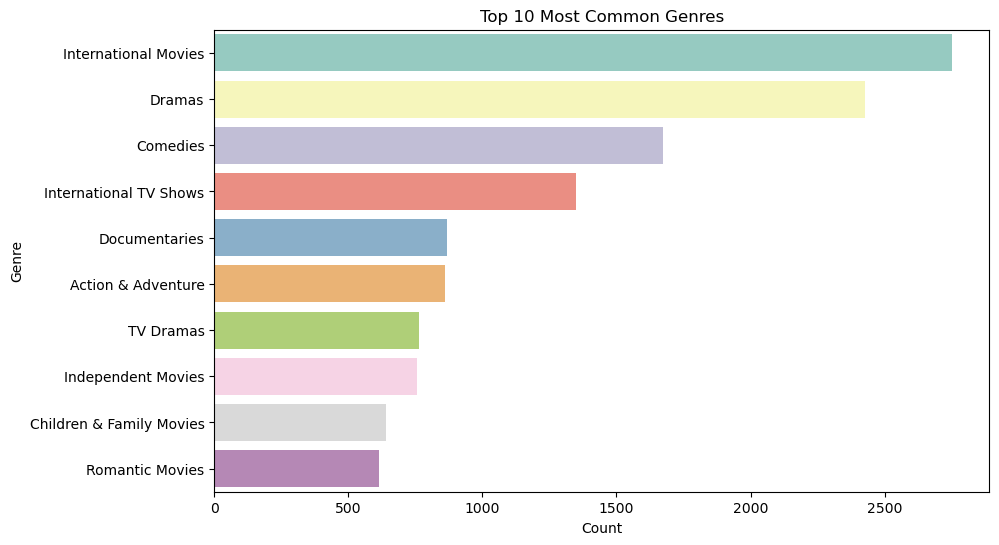

In [28]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25416\3746928254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


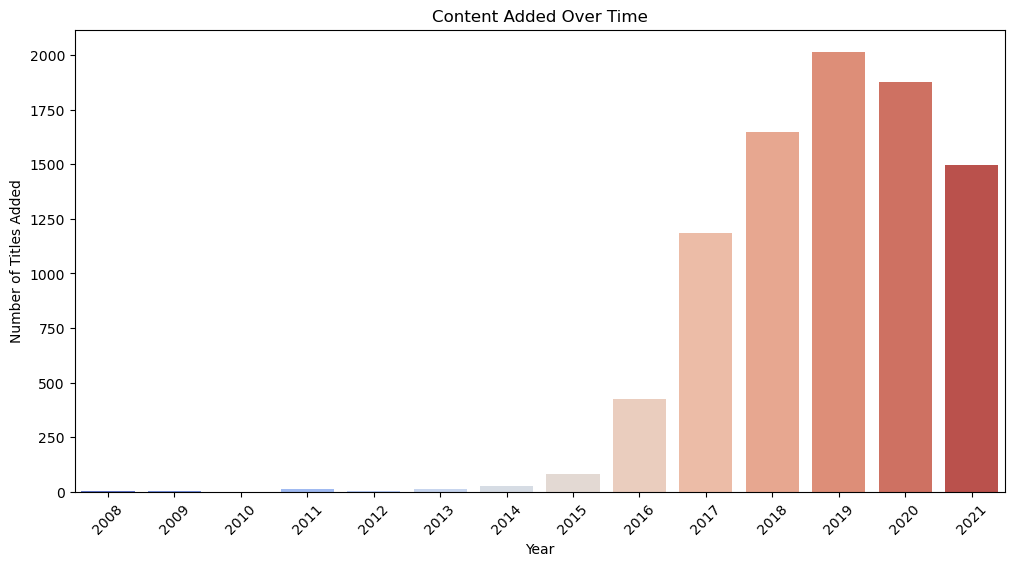

In [29]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25416\3375617755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')


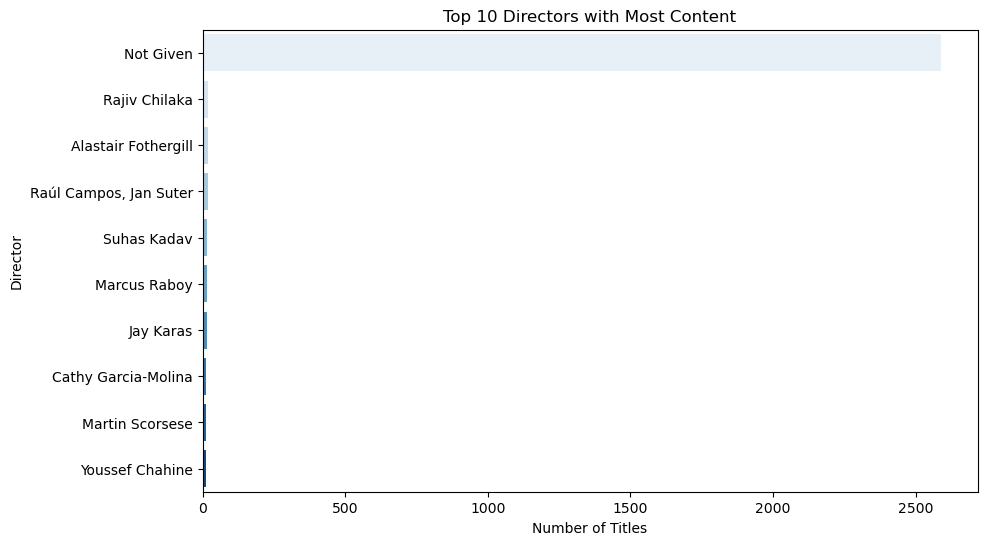

In [30]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')
plt.title('Top 10 Directors with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


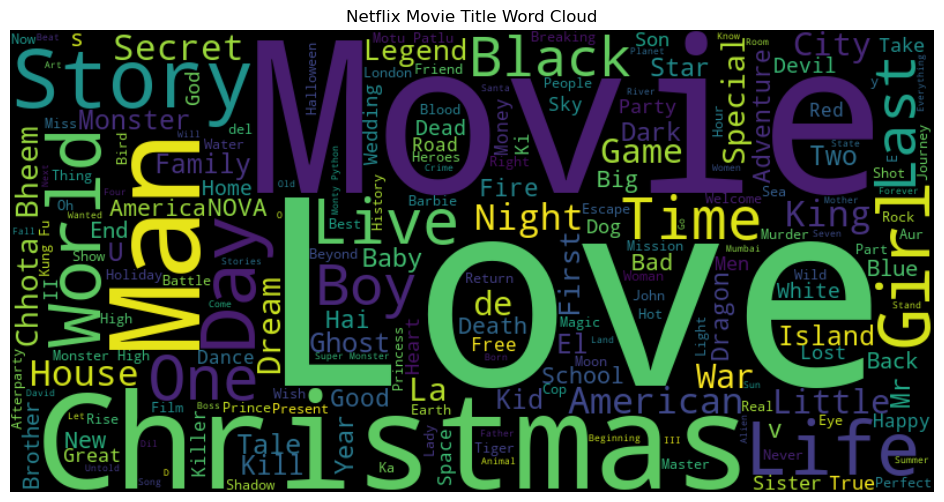

In [31]:
from wordcloud import WordCloud

titles = ' '.join(df[df['type'] == 'Movie']['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Movie Title Word Cloud')
plt.show()


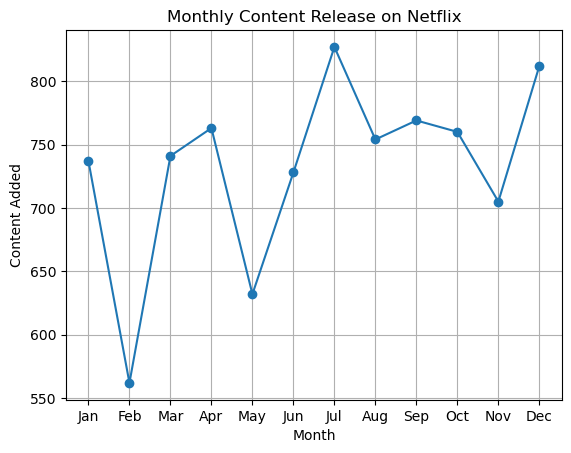

In [32]:
df['month_added'] = df['date_added'].dt.month

monthly = df['month_added'].value_counts().sort_index()

plt.plot(monthly.index, monthly.values, marker='o')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Content Added')
plt.title('Monthly Content Release on Netflix')
plt.grid(True)
plt.show()


In [33]:
from IPython.display import display, Markdown

display(Markdown("""
## 📌 Conclusion

In this Netflix Data Analysis project, we explored over 8,000 titles available on the platform from 2008 to 2021. Through data cleaning, transformation, and visualization, we uncovered several insights:

- 🎬 **Movies dominate** Netflix's content, accounting for ~70% of the catalog.
- 🌍 The **United States**, **India**, and the **United Kingdom** contribute the most content.
- 🎭 **Dramas**, **Comedies**, and **Documentaries** are among the most common genres.
- 🧑‍🎓 Directors like **Rajiv Chilaka**, **Raúl Campos**, and **Jan Suter** appear frequently.
- 🗓️ The highest volume of content was added between **2018 and 2021**.
- 📅 **Content is added consistently year-round**, with peaks around Q3–Q4.

This project provided a solid understanding of Netflix’s content trends, offering insights valuable for content strategy, recommendation engines, and further machine learning applications.
"""))



## 📌 Conclusion

In this Netflix Data Analysis project, we explored over 8,000 titles available on the platform from 2008 to 2021. Through data cleaning, transformation, and visualization, we uncovered several insights:

- 🎬 **Movies dominate** Netflix's content, accounting for ~70% of the catalog.
- 🌍 The **United States**, **India**, and the **United Kingdom** contribute the most content.
- 🎭 **Dramas**, **Comedies**, and **Documentaries** are among the most common genres.
- 🧑‍🎓 Directors like **Rajiv Chilaka**, **Raúl Campos**, and **Jan Suter** appear frequently.
- 🗓️ The highest volume of content was added between **2018 and 2021**.
- 📅 **Content is added consistently year-round**, with peaks around Q3–Q4.

This project provided a solid understanding of Netflix’s content trends, offering insights valuable for content strategy, recommendation engines, and further machine learning applications.
